In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
birth_rate = pd.read_csv("birth-rate.csv")
birth_rate.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281


In [18]:
# Create a scatterplot for the USA's birth rate from 1960 and on

birth_rate_USA = birth_rate[birth_rate['Country'] == "United States"]
birth_rate_USA.reset_index(inplace=True)
birth_rate_USA.drop("Country", axis=1, inplace=True)
birth_rate_USA.drop("index", axis=1, inplace=True)
birth_rate_USA.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,23.7,23.3,22.4,21.7,21.1,19.4,18.4,17.8,17.6,17.9,...,14.5,14.7,14.1,13.9,14.14,14.13,14.0,14.2,14.254065,14.300958


In [29]:
# Create a pivot to set up our data
birth_rate_USA_pivot = birth_rate_USA.reset_index().pivot_table(columns='index')
birth_rate_USA_pivot = birth_rate_USA_pivot.reset_index().rename(columns = {0:"birth_rate", "index":"year"})
birth_rate_USA_pivot.head()

index,year,birth_rate
0,1960,23.7
1,1961,23.3
2,1962,22.4
3,1963,21.7
4,1964,21.1


Text(0.5, 1.0, 'Year vs Birth Rate in the USA')

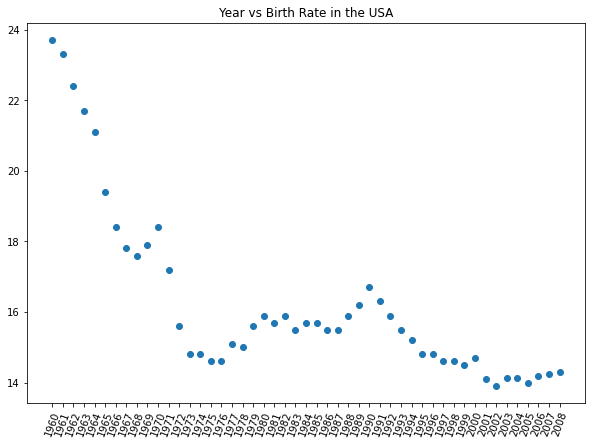

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(x=birth_rate_USA_pivot["year"], y=birth_rate_USA_pivot['birth_rate'])
plt.xticks(birth_rate_USA_pivot["year"], rotation=70)
plt.title("Year vs Birth Rate in the USA")

Text(0.5, 1.0, 'Year vs Birth Rate in the USA')

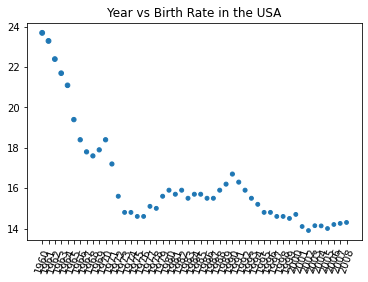

In [59]:
# Bubble plot
plt.scatter(x=birth_rate_USA_pivot["year"], 
            y=birth_rate_USA_pivot['birth_rate'], 
            # s is used to determine the size of the bubbles, while suttle, the bubbles do change in size
            s = birth_rate_USA_pivot['birth_rate'] )
plt.xticks(birth_rate_USA_pivot["year"], rotation=70)
plt.title("Year vs Birth Rate in the USA")

Text(0.5, 1.0, 'Yearly birth rate in the USA')

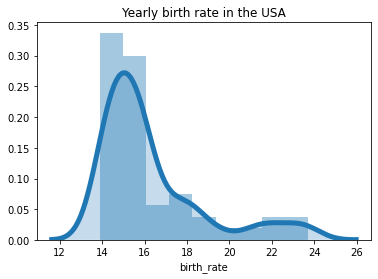

In [71]:
# Density plot
sns.distplot(birth_rate_USA_pivot['birth_rate'], 
             hist = True, 
             kde = True, 
             kde_kws = {'shade': True, 
                        'linewidth': 5}
            ).set_title('Yearly birth rate in the USA')